# Risfan Novrian - I.2111731

In [2]:
# Soal No 2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
import numpy as np

In [3]:
# Soal No 3
(x_train, x_label), (y_test, y_label) = cifar100.load_data(label_mode='fine')

#nama superkelas
indeks_people = {
    "baby": 2,
    "boy": 11,
    "girl": 35,
    "man": 46,
    "woman": 98
}

In [4]:
# Soal No 4
print("Jumlah data gambar data train : ", x_train.shape)
print("Jumlah data gambar data test : ", y_test.shape)

Jumlah data gambar data train :  (50000, 32, 32, 3)
Jumlah data gambar data test :  (10000, 32, 32, 3)


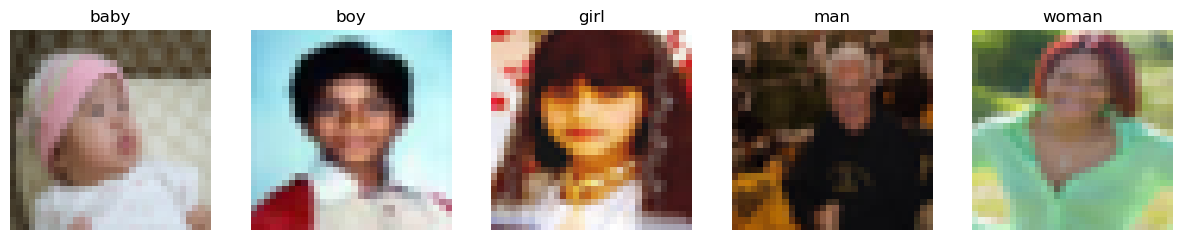

In [5]:
# Soal No 5
plt.figure(figsize=(15,3))
for i, (nama_kelas, nama_indeks) in enumerate (indeks_people.items()):
    indeks = np.where(x_label.flatten() == nama_indeks)[0][0]
    plt.subplot(1, len(indeks_people), i+1)
    plt.imshow(x_train[indeks])
    plt.title(nama_kelas)
    plt.axis("off")
plt.show()

In [6]:
# Soal No 6
indeks2_people = [2, 11, 35, 46, 98]

x_train_baru = []
x_label_baru = []

for i in indeks2_people:
    indeks = np.where(x_label == i)[0]
    x_train_baru.append(x_train[indeks])
    x_label_baru.append(x_label[indeks])
    
x_train_baru = np.concatenate(x_train_baru) #tujuannya untuk menggabungkan dua atau lebih array
x_label_baru = np.concatenate(x_label_baru)

print("Jumlah data gambar data train baru : ", x_train_baru.shape)
print("Jumlah data gambar data label baru : ", x_label_baru.shape)

Jumlah data gambar data train baru :  (2500, 32, 32, 3)
Jumlah data gambar data label baru :  (2500, 1)


In [7]:
# Soal No 7
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

x_train = x_train/255.0
y_test = y_test/255.0

In [8]:
# Soal No 8
from tensorflow.keras import datasets, layers, models

model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])

In [9]:
#Soal No 9
model_rcnn = tf.keras.Sequential([
    tf.keras.layers.Reshape((32, 32, 3), input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])

### Soal No 10

- MaxPooling2D Layer: berfungsi Mengurangi dimensi spasial dari gambar. Dalam kasus ini, ukuran gambar tidak berubah karena MaxPooling memiliki ukuran yang sama dengan stride.
- Conv2D Layer : berfungsi melakukan konvolusi pada inputnya. 
- Flatten : berfungsi Mengubah peta fitur 2 dimensi menjadi 1 dimensi. Ini diperlukan sebelum memasukkan data ke lapisan Dense.
- Dense : ungsi utama dari lapisan Dense adalah memproses input dari lapisan sebelumnya dengan melakukan transformasi linear dan menghasilkan output yang kemudian dapat diumpankan ke lapisan selanjutnya.

In [12]:
# Soal No 11
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.fit(x_train, x_label, epochs=10, batch_size=256)

Epoch 1/10
196/196 [==============================] - 25s 117ms/step - loss: 4.3998 - accuracy: 0.0415
Epoch 2/10
196/196 [==============================] - 23s 117ms/step - loss: 4.0122 - accuracy: 0.0876
Epoch 3/10
196/196 [==============================] - 24s 120ms/step - loss: 3.9109 - accuracy: 0.1060
Epoch 4/10
196/196 [==============================] - 24s 121ms/step - loss: 3.8608 - accuracy: 0.1144
Epoch 5/10
196/196 [==============================] - 23s 116ms/step - loss: 3.8171 - accuracy: 0.1226
Epoch 6/10
196/196 [==============================] - 25s 130ms/step - loss: 3.7844 - accuracy: 0.1280
Epoch 7/10
196/196 [==============================] - 26s 131ms/step - loss: 3.7815 - accuracy: 0.1293
Epoch 8/10
196/196 [==============================] - 27s 138ms/step - loss: 3.7667 - accuracy: 0.1294
Epoch 9/10
196/196 [==============================] - 25s 128ms/step - loss: 3.7427 - accuracy: 0.1344
Epoch 10/10
196/196 [==============================] - 24s 122ms/step - l

In [14]:
# Soal No 12

model_rcnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_rcnn.fit(x_train, x_label, epochs=10, batch_size=256)

Epoch 1/10
196/196 [==============================] - 26s 125ms/step - loss: 4.2432 - accuracy: 0.0551
Epoch 2/10
196/196 [==============================] - 25s 127ms/step - loss: 3.6954 - accuracy: 0.1390
Epoch 3/10
196/196 [==============================] - 26s 132ms/step - loss: 3.3788 - accuracy: 0.1933
Epoch 4/10
196/196 [==============================] - 27s 138ms/step - loss: 3.2161 - accuracy: 0.2223
Epoch 5/10
196/196 [==============================] - 28s 141ms/step - loss: 3.0775 - accuracy: 0.2450
Epoch 6/10
196/196 [==============================] - 25s 125ms/step - loss: 2.9986 - accuracy: 0.2616
Epoch 7/10
196/196 [==============================] - 26s 133ms/step - loss: 2.9218 - accuracy: 0.2766
Epoch 8/10
196/196 [==============================] - 25s 128ms/step - loss: 2.8622 - accuracy: 0.2872
Epoch 9/10
196/196 [==============================] - 25s 127ms/step - loss: 2.8016 - accuracy: 0.2984
Epoch 10/10
196/196 [==============================] - 25s 127ms/step - l

In [15]:
# Soal No 13

model_cnn.save('model_cnn.h5')
model_rcnn.save('model_rcnn.h5')

# Muat kembali model
loaded_model_cnn = tf.keras.models.load_model('model_cnn.h5')
loaded_model_rcnn = tf.keras.models.load_model('model_rcnn.h5')


C:\Users\SMK_AMALIAH_1\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


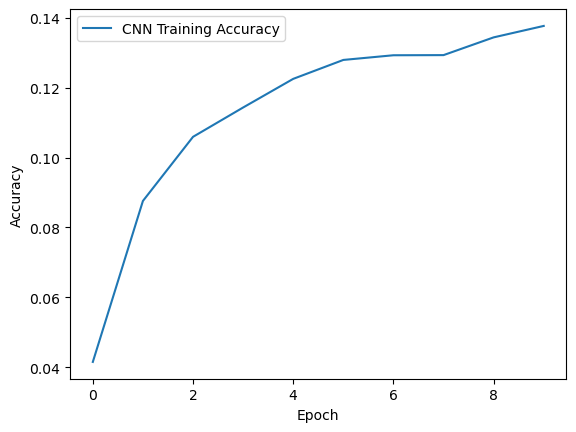

In [16]:
# Soal No 14

plt.plot(model_cnn.history.history['accuracy'], label='CNN Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

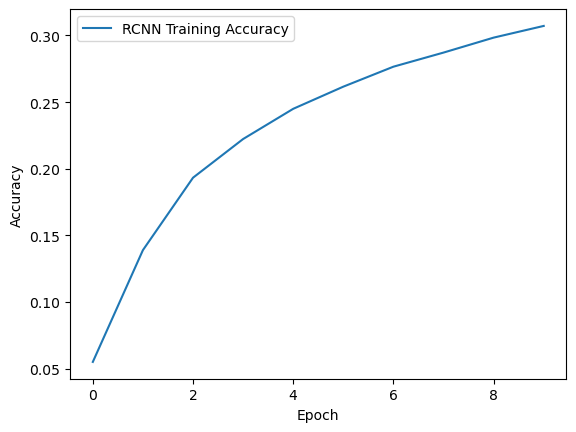

In [17]:
# Soal No 15

plt.plot(model_rcnn.history.history['accuracy'], label='RCNN Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Soal No 16

kesimpulan yang saya dapat dari perbandingan model pertama dan model kedua, tingkat akurasi yang lebih baik didapatkan oleh model kedua dengan loss : 2.7547 dan accuracy : 0.3072